In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets

X, y = datasets.make_moons(noise = 0.25, random_state = 666)

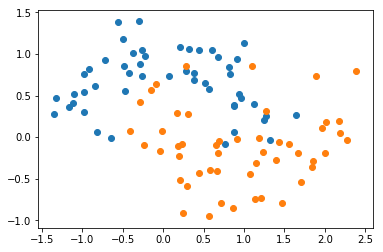

In [4]:
plt.scatter(X[y==0, 0],X[y==0, 1])
plt.scatter(X[y==1, 0],X[y==1, 1])
plt.show()

### 默认Gini为决策树的标准来划分，默认划分到底（直到每个节点的Gini都是0）

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier() #默认
dt_clf.fit(X,y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


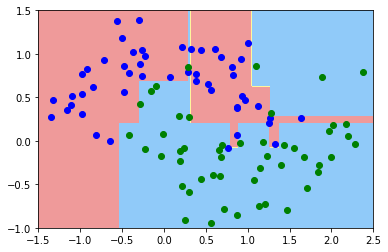

In [7]:
plot_decision_boundary(dt_clf, axis = [-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.show()

#### 观察：
0. 出现过拟合
1. 因为是默认值分类到底，所以出现过拟合

### 最大深度==2

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


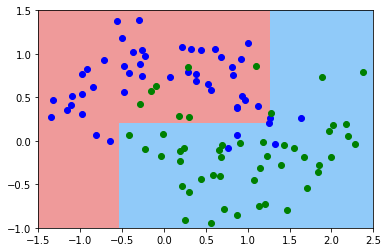

In [8]:
dt_clf2 = DecisionTreeClassifier(max_depth=2) 
dt_clf2.fit(X,y)
plot_decision_boundary(dt_clf2, axis = [-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.show()

#### 观察：
上面的结果可能存在欠拟合

### min_samples_split
0. 每个节点至少还有min_samples_split个样本，才继续对这个节点进行拆分
1. 这个值越低，越可能继续拆分，越可能过拟合
2. 这个值越高，越可能欠拟合

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


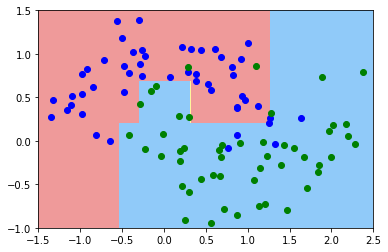

In [9]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=10) 
dt_clf3.fit(X,y)
plot_decision_boundary(dt_clf3, axis = [-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.show()

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


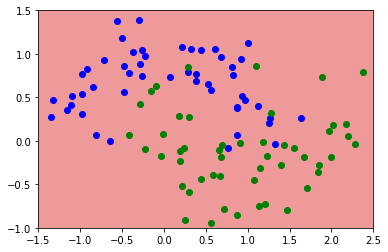

In [10]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=10000) 
dt_clf3.fit(X,y)
plot_decision_boundary(dt_clf3, axis = [-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.show()

#### 上图欠拟合

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


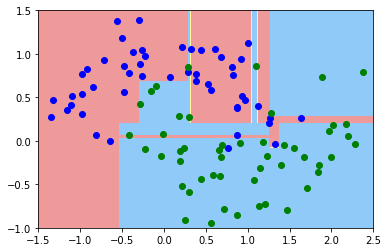

In [12]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=2) 
dt_clf3.fit(X,y)
plot_decision_boundary(dt_clf3, axis = [-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.show()

#### 上图过拟合

### min_samples_leaf
一个叶子节点，最少有几个样本，如果min_samples_leaf越小，说明叶子节点的样本数越小，越容易过拟合。

我的疑问：应该是一个叶子最多有几个样本吧？？

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


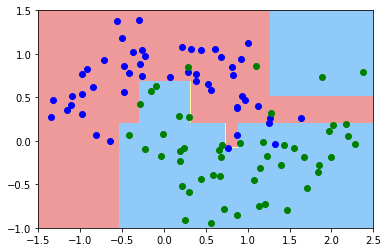

In [19]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=2) 
dt_clf4.fit(X,y)
plot_decision_boundary(dt_clf4, axis = [-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.show()

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


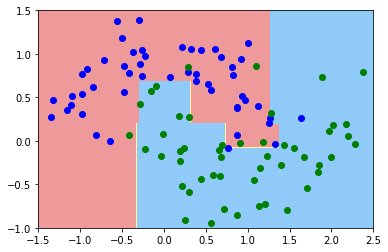

In [25]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=3) 
dt_clf4.fit(X,y)
plot_decision_boundary(dt_clf4, axis = [-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.show()

### max_leaf_nodes
最多有几个叶子节点。叶子越多，说明我们的split的次数越多，越容易过拟合。

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


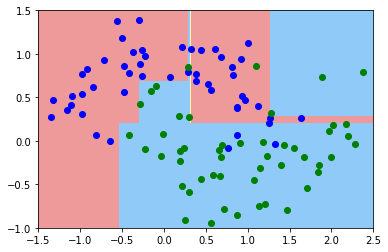

In [20]:
dt_clf5 = DecisionTreeClassifier(max_leaf_nodes=10) 
dt_clf5.fit(X,y)
plot_decision_boundary(dt_clf5, axis = [-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.show()

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


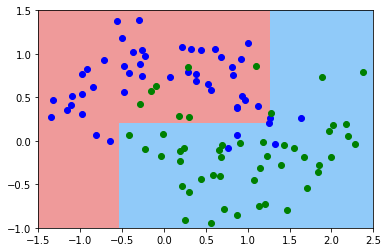

In [23]:
dt_clf5 = DecisionTreeClassifier(max_leaf_nodes=4) 
dt_clf5.fit(X,y)
plot_decision_boundary(dt_clf5, axis = [-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.show()